In [32]:
import pandas as pd

#Load the data
df5  = pd.read_pickle('m5_example.pkl')
df5['ensemble'] = 'm5'

df6  = pd.read_pickle('m6_example.pkl')
df6['ensemble'] = 'm6'

df7  = pd.read_pickle('m7_example.pkl')
df7['ensemble'] = 'm7'




df = pd.concat([df5,df6,df7])





In [33]:
df

,temperature,label,level,precision,title,X,ensemble,tt
0,286.025455,speedyone100yr_L2_52_RN_m5,L2,52_RN,EC Earth SST. ablco2=6,0,m5,NaN
1,286.725405,speedyone100yr_L2_52_RN_m5,L2,52_RN,EC Earth SST. ablco2=6,1,m5,NaN
2,286.979427,speedyone100yr_L2_52_RN_m5,L2,52_RN,EC Earth SST. ablco2=6,2,m5,NaN
3,287.126005,speedyone100yr_L2_52_RN_m5,L2,52_RN,EC Earth SST. ablco2=6,3,m5,NaN
4,287.245411,speedyone100yr_L2_52_RN_m5,L2,52_RN,EC Earth SST. ablco2=6,4,m5,NaN
...,...,...,...,...,...,...,...,...
36496,291.876506,speedyone100yr_L2_10_RN_m7,L2,10_RN,EC Earth SST. ablco2=6,36496,m7,100.0
36497,291.909728,speedyone100yr_L2_10_RN_m7,L2,10_RN,EC Earth SST. ablco2=6,36497,m7,100.0
36498,291.907080,speedyone100yr_L2_10_RN_m7,L2,10_RN,EC Earth SST. ablco2=6,36498,m7,100.0
36499,291.899547,speedyone100yr_L2_10_RN_m7,L2,10_RN,EC Earth SST. ablco2=6,36499,m7,100.0


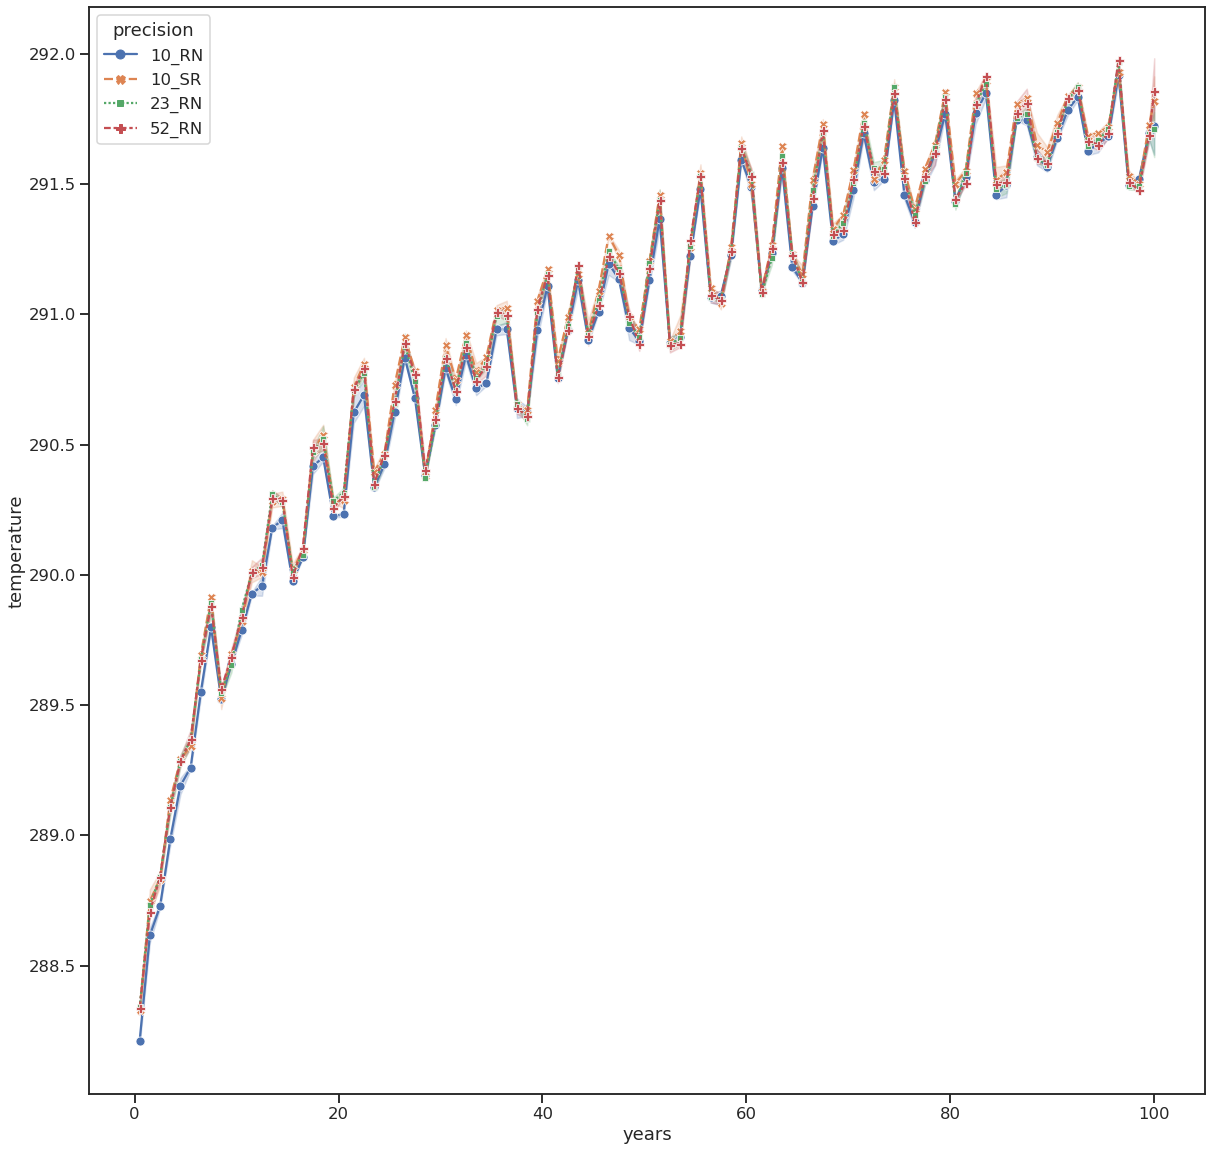

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt






def plot_timeseries(df,time_period):



    # Take an average over time_period number of days. Set time_period = 365 for yearly average
    df_averaged = df.groupby([df.index//time_period, 'label','level','precision', 'title','ensemble'],as_index=False).mean()
    df_averaged['years'] =  df_averaged['X'] / 365 #Convert from days to years

    #Setup plot configuration
    h,w = 20,20

    sns.set_theme(context='talk', 
                  style='ticks', 
                  palette='deep',
                  rc={'figure.figsize':(h,w)}
                  )

    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(h,w))



    p = sns.lineplot(data=df_averaged, x="years", y='temperature', hue="precision",ax=ax,style='precision',markers=True)

    
    
    
    
    
    
plot_timeseries(df,time_period=365)
    
    
    
#     #Get the residuals of the averaged df
#     df_residuals = calculate_residuals(df_averaged)
    


   
    
    
#     #Plot the timeseries
    
#     #Plot the residuals
#     q = sns.lineplot(data=df_residuals, x="years", y='MBE', hue="precision",ax=ax2,style='precision',markers=False,legend=None)

#     #Config
#     plt.subplots_adjust(wspace=0.1, hspace=0)

#     ax1.set_ylabel("Global Mean Surface Temperature (K)")
#     ax2.set_ylabel("Absolute Error (K)")

    
#     ax2.set_xlabel("Time (years)")
#     ax2.axhline(0.0, c='0.5', linestyle='--')
#     #ax2.set_yscale('log')
    
#     ax1.set_ylim(288,292.5)

#     #Other config
#     ax1.legend().set_title(None)
    

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
def calculate_residuals(df):
    
    
    #Get a ground truth that all others will be compared against. i.e. 52 RNe
    df_truth = df.query('precision == "52_RN" ')[['X', 'temperature']]
    df_truth['merge_column'] = df_truth['X'].astype(int) #Create a column to merge on.     #Note integer conversions are needed for join

    
    #Get the others
    df_rest = df.query('precision != "52_RN" ').reset_index(drop=True) #reset index to avoid SettingWithCopyWarning
    df_rest['merge_column'] = df_rest['X'].astype('int') 
    

    #Rejoin - maybe a more efficient way to do this?
    df_join = pd.merge(df_rest,df_truth,how='left',on='merge_column', suffixes=(None, 'truth'))
    
    #Get residual
    df_join['MBE'] = df_join['temperature'] - df_join['temperaturetruth']
    df_join['MAE'] = abs(df_join['temperature'] - df_join['temperaturetruth'])
    
    print ('Average:')
    display(df_join.groupby(by=["precision"]).mean()) 
    display(len(df_join))
    return df_join

def plot_timeseries(df,time_period):
    
    #Take an average over time_period number of days. Set time_period = 365 for yearly average
    df_averaged = df.groupby([df.index//time_period, 'label','level','precision', 'title'],as_index=False).mean()
    df_averaged['years'] =  df_averaged['X'] / 365 #Convert from days to years
    
    #Get the residuals of the averaged df
    df_residuals = calculate_residuals(df_averaged)
    
    #Setup plot configuration
    h,w = 20,20

    sns.set_theme(context='talk', 
                  style='ticks', 
                  palette='deep',
                  rc={'figure.figsize':(h,w)}
                  )

    fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(h,w))

   
    
    
    #Plot the timeseries
    p = sns.lineplot(data=df_averaged, x="years", y='temperature', hue="precision",ax=ax1,style='precision',markers=True)
    
    #Plot the residuals
    q = sns.lineplot(data=df_residuals, x="years", y='MBE', hue="precision",ax=ax2,style='precision',markers=False,legend=None)

    #Config
    plt.subplots_adjust(wspace=0.1, hspace=0)

    ax1.set_ylabel("Global Mean Surface Temperature (K)")
    ax2.set_ylabel("Absolute Error (K)")

    
    ax2.set_xlabel("Time (years)")
    ax2.axhline(0.0, c='0.5', linestyle='--')
    #ax2.set_yscale('log')
    
    ax1.set_ylim(288,292.5)

    #Other config
    ax1.legend().set_title(None)
    
    
    

Average:


,temperature,X,years,merge_column,Xtruth,temperaturetruth,MBE,MAE
precision,,,,,,,,
10_RN,290.907039,18430.19802,50.493693,18430.19802,18430.19802,290.952662,-0.045623,0.052796
10_SR,290.968044,18430.19802,50.493693,18430.19802,18430.19802,290.952662,0.015382,0.034523
23_RN,290.948956,18430.19802,50.493693,18430.19802,18430.19802,290.952662,-0.003706,0.026868


303

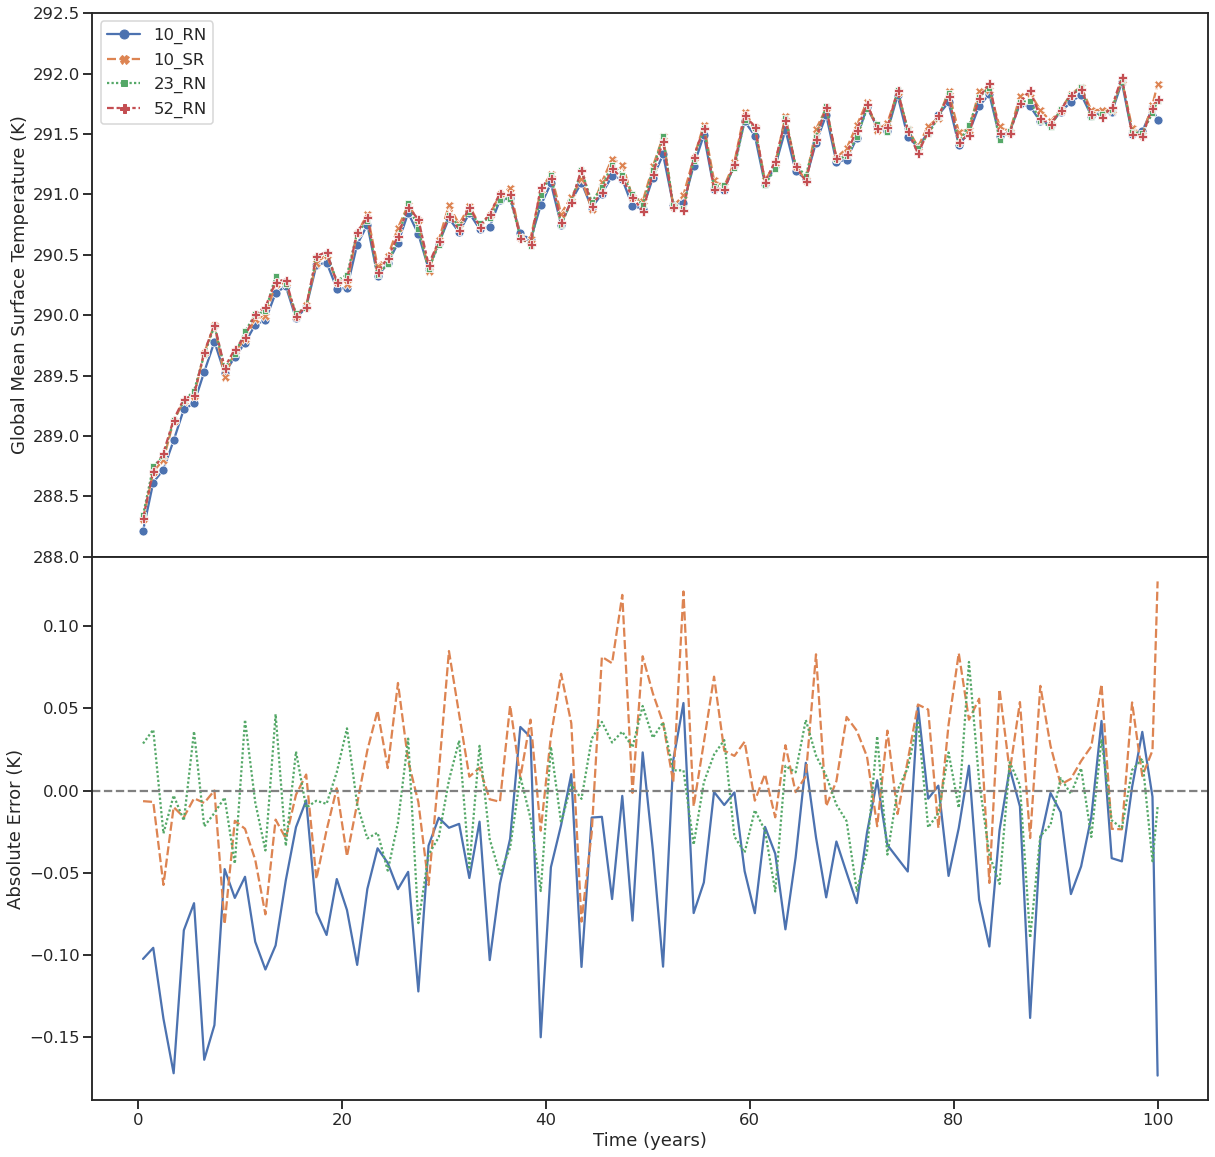

In [9]:
plot_timeseries(df,time_period=365)

Average:


,temperature,X,years,merge_column,Xtruth,temperaturetruth,MBE,MAE
precision,,,,,,,,
10_RN,290.901433,18250.0,50.0,18250.0,18250.0,290.940274,-0.038841,0.126078
10_SR,290.963730,18250.0,50.0,18250.0,18250.0,290.940274,0.023456,0.135560
23_RN,290.941337,18250.0,50.0,18250.0,18250.0,290.940274,0.001063,0.120855


109503

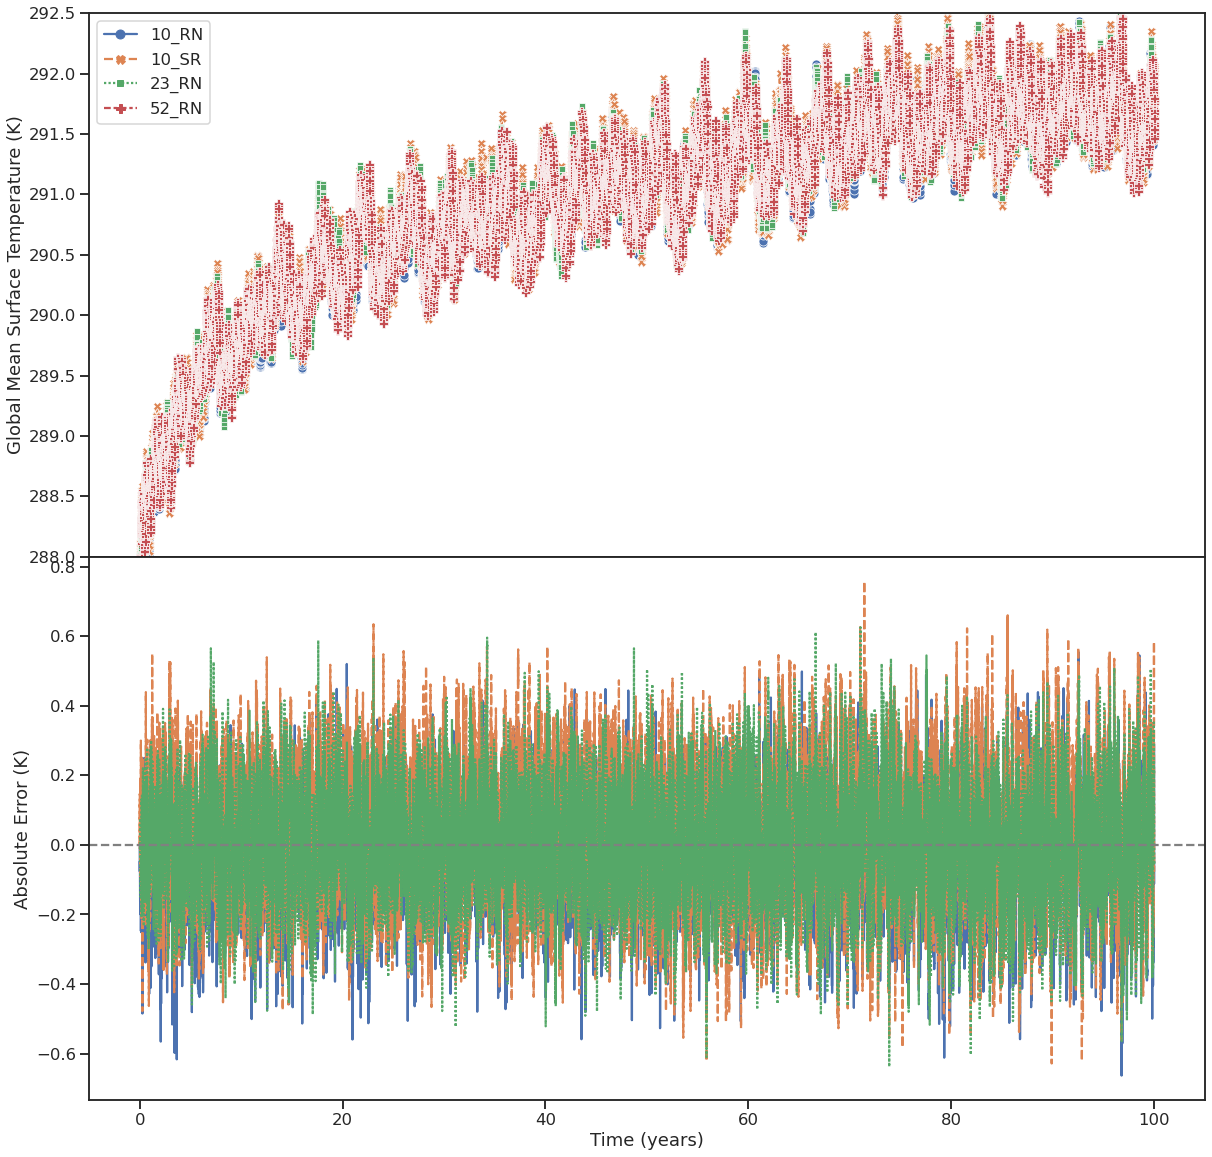

In [81]:
plot_timeseries(df,time_period=365)

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_config(ax1,ax2,save):
    

    #Config
    plt.subplots_adjust(wspace=0.1, hspace=0)

    ax1.set_ylabel("Gloabl Mean Surface Temperature (K)")#, fontsize = 20)
    ax2.set_ylabel("Absolute Error (K)")#, fontsize = 20)


    ax2.set_xlabel("Time (years)")#, fontsize = 20)
    ax2.axhline(0.0, c='0.5', linestyle='--')
    

   # ax1.set_xlim(0,400)
    ax1.set_ylim(288,292.5)

    #Other config
    ax1.legend().set_title(None)
    
    if save:
        plt.savefig('figs/Fig1_Williams.png', dpi=300, bbox_inches='tight')


    
    
def get_relative_error_df(df):
    
    
    #Get a ground truth that all others will be compared against
    df_truth = df.query('precision == "52_RN" ')[['X', 'temperature']]
    df_truth['merge_column'] = df_truth['X'].astype(int)
    
    #Get the others
    df_rest = df.query('precision != "52_RN" ').reset_index(drop=True) #rest index to avoid SettingWithCopyWarning
    df_rest['merge_column'] = df_rest['X'].astype('int') 
    
    #Note integer conversions are needed for join

    #Rejoin - maybe a more efficient way to do this?
    df_join = pd.merge(df_rest,df_truth,how='left',on='merge_column', suffixes=(None, 'truth'))
    
    
    #Get the absolute error
    #df_join['error']  = df_join['temperature'] - df_join['temperaturetruth']
    df_join['error']  = abs(df_join['temperature'] - df_join['temperaturetruth'])/df_join['temperaturetruth']

    
    return df_join
    
def plot_error_timeseries(df1,df2,save_it):
    
    #Setup plot env
    h,w = 20,20

    sns.set_theme(context='talk', 
                  style='ticks', 
                  palette='deep',
                  rc={'figure.figsize':(h,w)}
                  )

    

    
    fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(h,w))
    
    df1['years'] = df1.X/365
    
    
    #Plot the df directly
    p = sns.lineplot(data=df1, x="years", y='temperature', hue="precision",ax=ax1,style='precision',markers=True)


    #Calculate the relative_error df and plot
    df_error = get_relative_error_df(df1)
    #df_error['years'] = df2.X #/365

    df_error['years'] = df_error['X']/365
    
    decadal_window = 1 #take an average over N years
    df_error_decadal = df_error.groupby([df_error.years//decadal_window, 'label','level','precision', 'title'],as_index=False).mean()
    p = sns.lineplot(data=df_error_decadal, x="years", y='error', hue="precision",ax=ax2,style='precision',markers=True,legend=None)


    plot_config(ax1,ax2,save_it)

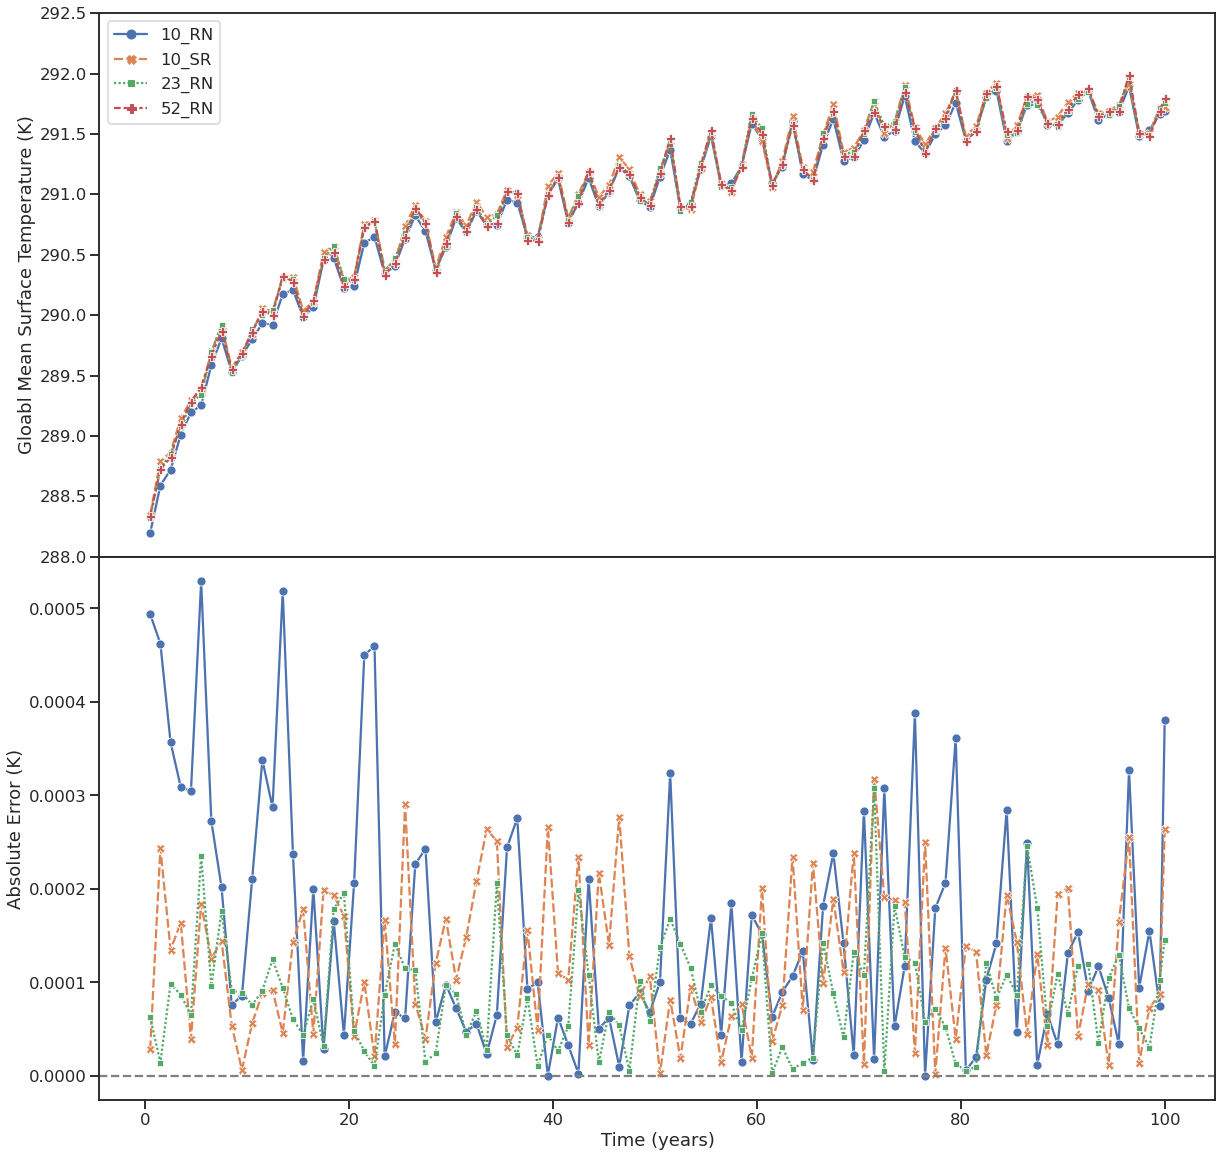

In [19]:
save_it = True #Do you want to save the Fig?
plot_error_timeseries(df_annual_mean,df_decadal_mean,save_it)

In [23]:
df_decadal_mean['years'] = df_decadal_mean.X/365 

In [21]:
df_error = get_relative_error_df(df_annual_mean)
